In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,NaN,3.0,115.0,564.0,0,2.0,NaN,NaN,1.6,NaN,NaN,NaN
2,1.0,57.0,2.0,124.0,261.0,0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4.0,128.0,263.0,0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2.0,120.0,269.0,0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,1,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,120.0,263.0,0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,140.0,192.0,0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	22
float64		column 2	28
float64		column 3	35
float64		column 4	14
float64		column 5	7
int64		column 6	0
float64		column 7	21
float64		column 8	22
float64		column 9	36
float64		column 10	14
float64		column 11	57
float64		column 12	36
float64		column 13	50


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,248.000000,242.000000,235.000000,256.000000,263.000000,270.000000,249.000000,248.000000,234.000000,256.000000,213.000000,234.000000,220.000000
mean,0.677419,54.549587,3.157447,131.121094,249.418251,0.148148,1.048193,149.858871,0.333333,1.048828,1.596244,0.688034,4.650000
std,0.468409,9.016330,0.967803,17.949083,51.750650,0.355906,0.998833,23.505195,0.472415,1.143026,0.603750,0.954381,1.927984
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,212.500000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,279.000000,0.000000,2.000000,168.000000,1.000000,1.800000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

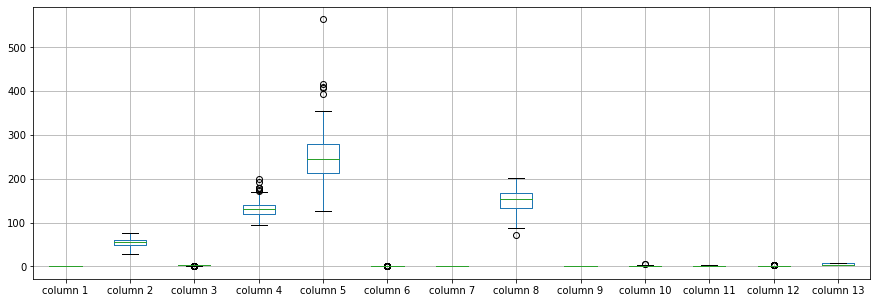

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.677419
column 2      54.549587
column 3       3.157447
column 4     131.121094
column 5     249.418251
column 6       0.148148
column 7       1.048193
column 8     149.858871
column 9       0.333333
column 10      1.048828
column 11      1.596244
column 12      0.688034
column 13      4.650000
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.066308,0.036987,-0.046036,-0.178181,0.022649,0.067692,-0.052239,0.188086,0.063596,0.019715,0.097731,0.391482
column 2,-0.066308,1.000000,0.134945,0.237956,0.210108,0.129362,0.127790,-0.426898,0.082528,0.164060,0.167801,0.404616,0.137409
column 3,0.036987,0.134945,1.000000,-0.060920,0.117603,-0.057108,0.091914,-0.325331,0.315536,0.155128,0.124793,0.295851,0.192254
column 4,-0.046036,0.237956,-0.060920,1.000000,0.167292,0.162797,0.090748,-0.029635,0.015532,0.223364,0.144698,0.068707,0.126807
column 5,-0.178181,0.210108,0.117603,0.167292,1.000000,0.021063,0.135278,-0.066702,0.075900,0.038444,0.006322,0.159605,0.056634
column 6,0.022649,0.129362,-0.057108,0.162797,0.021063,1.000000,0.048861,0.026160,-0.033129,-0.025963,0.050061,0.094053,0.058181
column 7,0.067692,0.127790,0.091914,0.090748,0.135278,0.048861,1.000000,-0.073178,0.098206,0.084094,0.172366,0.081839,-0.018335
column 8,-0.052239,-0.426898,-0.325331,-0.029635,-0.066702,0.026160,-0.073178,1.000000,-0.397127,-0.339868,-0.403779,-0.288319,-0.254121
column 9,0.188086,0.082528,0.315536,0.015532,0.075900,-0.033129,0.098206,-0.397127,1.000000,0.228650,0.258408,0.244278,0.298133
column 10,0.063596,0.164060,0.155128,0.223364,0.038444,-0.025963,0.084094,-0.339868,0.228650,1.000000,0.583013,0.320515,0.323552


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+17,13+17+17,13+17+17+17,13+17+17+17+17,13+17+17+17+17+17,13+17+17+17+17,13+17+17+17,13+17+17,13+17,13], vae_layer = False, seed = 17)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 573.3342552185059
Epoch: 1 , loss: 576.8037643432617
Epoch: 2 , loss: 574.9280891418457
Epoch: 3 , loss: 577.6065292358398
Epoch: 4 , loss: 573.3118286132812
Epoch: 5 , loss: 575.4016380310059
Epoch: 6 , loss: 574.6209373474121
Epoch: 7 , loss: 575.621150970459
Epoch: 8 , loss: 577.4338836669922
Epoch: 9 , loss: 577.7159538269043
Epoch: 10 , loss: 576.7618980407715
Epoch: 11 , loss: 575.056568145752
Epoch: 12 , loss: 575.2622833251953
Epoch: 13 , loss: 575.3823890686035
Epoch: 14 , loss: 574.4847679138184
Epoch: 15 , loss: 573.702693939209
Epoch: 16 , loss: 578.4577598571777
Epoch: 17 , loss: 575.8680381774902
Epoch: 18 , loss: 575.3505973815918
Epoch: 19 , loss: 575.4244842529297
Epoch: 20 , loss: 577.8786239624023
Epoch: 21 , loss: 573.3724517822266
Epoch: 22 , loss: 575.5942230224609
Epoch: 23 , loss: 576.700065612793
Epoch: 24 , loss: 574.0345344543457
Epoch: 25 , loss: 576.4843215942383
Epoch: 26 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
1,0.0,-56.293527,0.0,0.0,0.0,0,0.0,-138.331774,0.201042,0.0,-1.155734,0.31836,-5.182603
2,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
266,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
267,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
268,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(994.9966004792758, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.183756620504535

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.000000,4.0,130.0,322.0,0,2.0,109.000000,0.000000,2.4,2.000000,3.00000,3.000000
1,0.0,10.706473,3.0,115.0,564.0,0,2.0,21.668226,0.201042,1.6,0.844266,0.31836,1.817397
2,1.0,57.000000,2.0,124.0,261.0,0,0.0,141.000000,0.000000,0.3,1.000000,0.00000,7.000000
3,1.0,64.000000,4.0,128.0,263.0,0,0.0,105.000000,1.000000,0.2,2.000000,1.00000,7.000000
4,0.0,74.000000,2.0,120.0,269.0,0,2.0,121.000000,1.000000,0.2,1.000000,1.00000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.000000,3.0,172.0,199.0,1,0.0,162.000000,0.000000,0.5,1.000000,0.00000,7.000000
266,1.0,44.000000,2.0,120.0,263.0,0,0.0,173.000000,0.000000,0.0,1.000000,0.00000,7.000000
267,0.0,56.000000,2.0,140.0,294.0,0,2.0,153.000000,0.000000,1.3,2.000000,0.00000,3.000000
268,1.0,57.000000,4.0,140.0,192.0,0,0.0,148.000000,0.000000,0.4,2.000000,0.00000,6.000000


In [20]:
imputations[-1].to_excel("Sheart_AE_10(imp).xlsx", index=False, header=False)